EDA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323671 entries, 0 to 323670
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Games        323285 non-null  object 
 1   edition_id   231674 non-null  float64
 2   NOC          231403 non-null  object 
 3   Sport        230433 non-null  object 
 4   Event        231729 non-null  object 
 5   result_id    231561 non-null  float64
 6   Name         231584 non-null  object 
 7   athlete_id   201794 non-null  float64
 8   pos          203255 non-null  object 
 9   Medal        323671 non-null  object 
 10  isTeamSport  201804 non-null  object 
 11  Height       179159 non-null  float64
 12  Weight       177653 non-null  float64
 13  Born         201257 non-null  object 
 14  Country      199944 non-null  object 
dtypes: float64(5), object(10)
memory usage: 37.0+ MB
None
                  Games  edition_id  NOC      Sport  \
0  1972 Summer Olympics        18.0  BEN  At

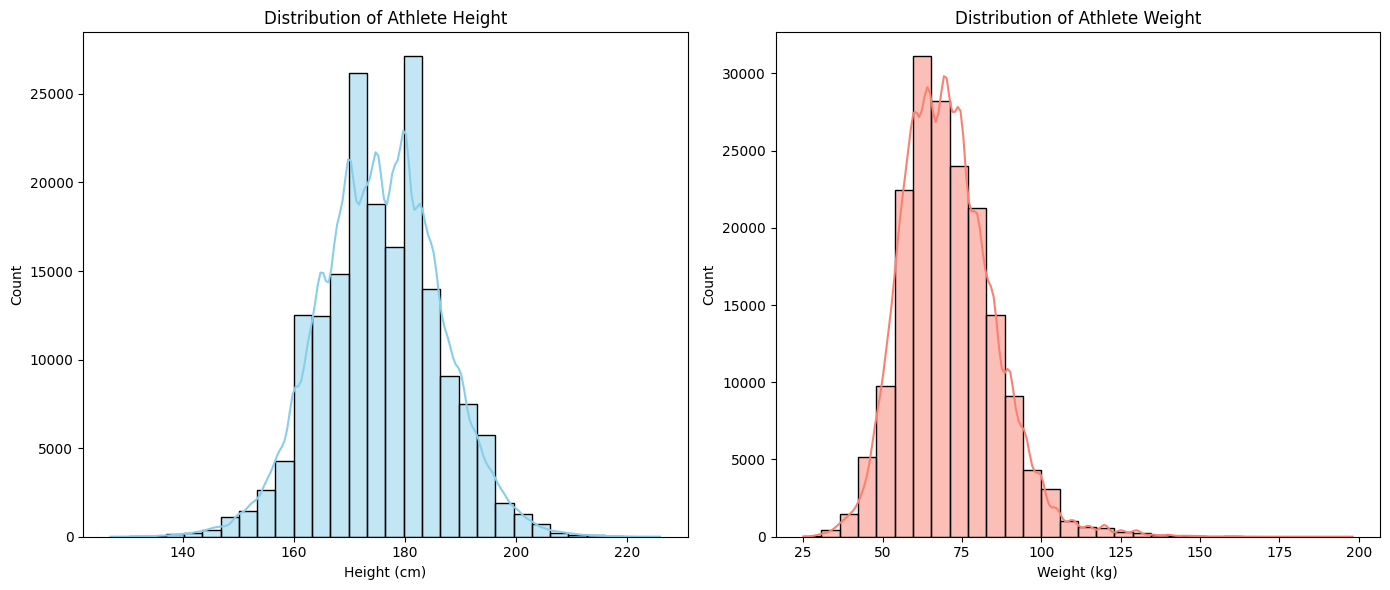

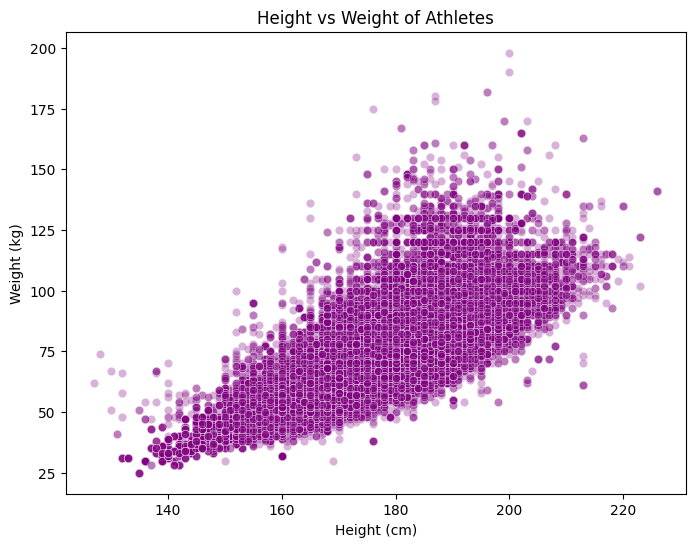

<ipython-input-3-edb23a307121>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


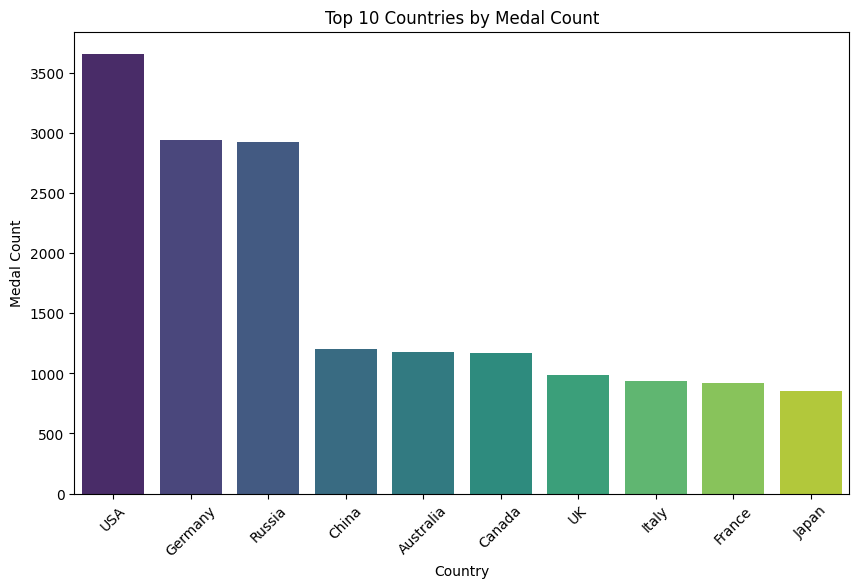

<ipython-input-3-edb23a307121>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.index, y=top_sports.values, palette='plasma')


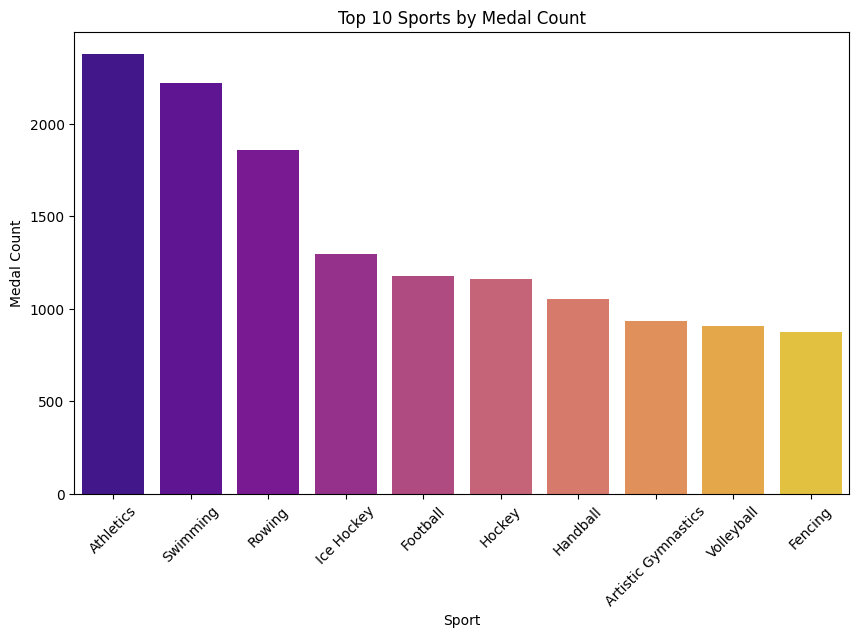

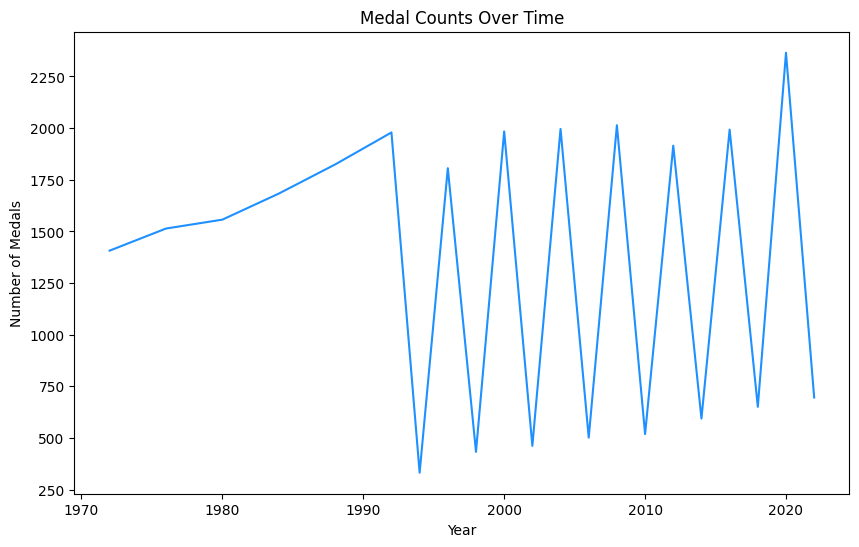

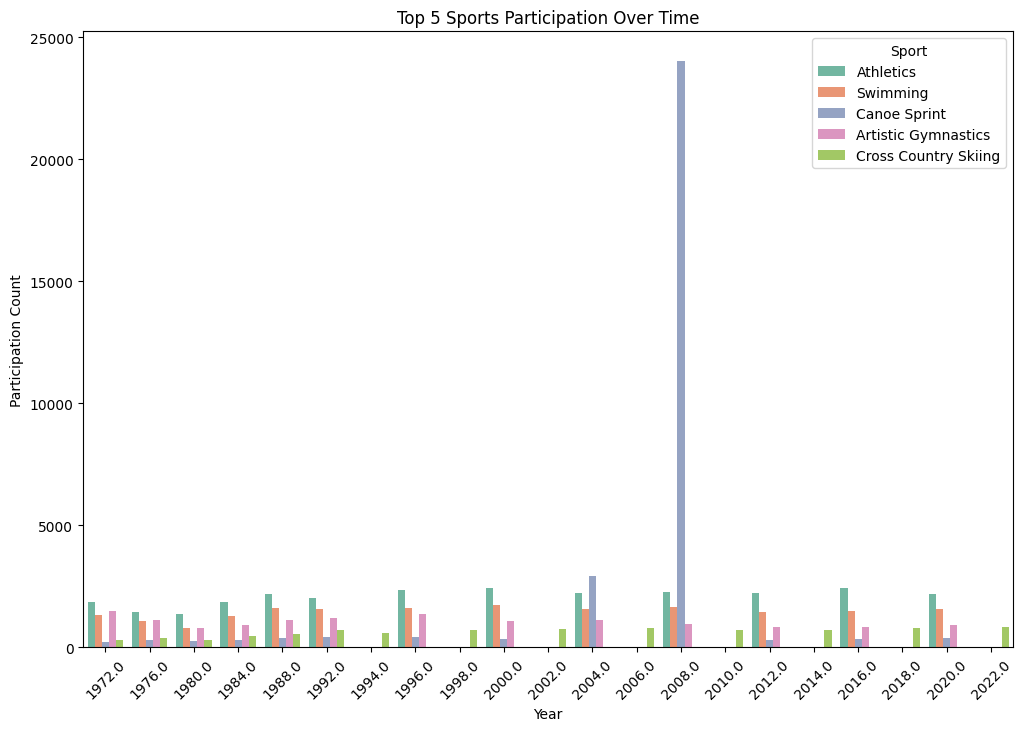

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df=pd.read_csv('/content/Cleaned_Olympic_Athlete_Event_Results.csv')

# Display basic information and inspect the first few rows
print(df.info())
print(df.head())

# Summary statistics for numerical columns (Height, Weight)
summary_stats = df[['Height', 'Weight']].describe()
median_values = df[['Height', 'Weight']].median()
print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)

# Histograms for Height and Weight distributions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Height'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Athlete Height')
plt.xlabel('Height (cm)')

plt.subplot(1, 2, 2)
sns.histplot(df['Weight'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Distribution of Athlete Weight')
plt.xlabel('Weight (kg)')
plt.tight_layout()
plt.show()

# Scatter plot for Height vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df, alpha=0.3, color='purple')
plt.title('Height vs Weight of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Medal distribution by country (Top 10 countries by medal count)
plt.figure(figsize=(10, 6))
top_countries = df[df['Medal'] != 'No Medal']['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()

# Medal distribution by sport (Top 10 sports by medal count)
plt.figure(figsize=(10, 6))
top_sports = df[df['Medal'] != 'No Medal']['Sport'].value_counts().head(10)
sns.barplot(x=top_sports.index, y=top_sports.values, palette='plasma')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Medal Count')
plt.xticks(rotation=45)
plt.show()

# Trends over time: Medal counts by year
df['Year'] = df['Games'].str.extract(r'(\d{4})').astype(float)  # Extract year from Games column
yearly_medal_counts = df[df['Medal'] != 'No Medal'].groupby('Year').size()

plt.figure(figsize=(10, 6))
yearly_medal_counts.plot(kind='line', color='dodgerblue')
plt.title('Medal Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

# Participation by sport over time (Top 5 sports with most participation)
top_sports_participation = df['Sport'].value_counts().head(5).index
df_top_sports = df[df['Sport'].isin(top_sports_participation)]
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_sports, x='Year', hue='Sport', palette='Set2')
plt.title('Top 5 Sports Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Participation Count')
plt.xticks(rotation=45)
plt.legend(title='Sport')
plt.show()
